<a href="https://colab.research.google.com/github/Faiz-Hibatullah/machine-learning-1103210172/blob/main/1.%20Week%201/regression_automobile.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import mglearn

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


#Dataset

In [10]:
# Mengambil dataset dari GitHub
url = "https://raw.githubusercontent.com/farrelrassya/teachingMLDL/main/01.%20Machine%20Learning/01.%20Week%201/Dataset/Automobile.csv"
df = pd.read_csv(url)
df

,price,highway-mpg,city-mpg,peak-rpm,horsepower,compression-ratio,stroke,bore,fuel-system,engine-size,...,wheel-base,engine-location,drive-wheels,body-style,num-of-doors,aspiration,fuel-type,make,normalized-losses,symboling
0,13495.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
1,16500.0,27,21,5000.0,111.0,9.0,2.68,3.47,mpfi,130,...,88.6,front,rwd,convertible,2.0,std,gas,alfa-romero,NaN,3
2,16500.0,26,19,5000.0,154.0,9.0,3.47,2.68,mpfi,152,...,94.5,front,rwd,hatchback,2.0,std,gas,alfa-romero,NaN,1
3,13950.0,30,24,5500.0,102.0,10.0,3.40,3.19,mpfi,109,...,99.8,front,fwd,sedan,4.0,std,gas,audi,164.0,2
4,17450.0,22,18,5500.0,115.0,8.0,3.40,3.19,mpfi,136,...,99.4,front,4wd,sedan,4.0,std,gas,audi,164.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,16845.0,28,23,5400.0,114.0,9.5,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
201,19045.0,25,19,5300.0,160.0,8.7,3.15,3.78,mpfi,141,...,109.1,front,rwd,sedan,4.0,turbo,gas,volvo,95.0,-1
202,21485.0,23,18,5500.0,134.0,8.8,2.87,3.58,mpfi,173,...,109.1,front,rwd,sedan,4.0,std,gas,volvo,95.0,-1
203,22470.0,27,26,4800.0,106.0,23.0,3.40,3.01,idi,145,...,109.1,front,rwd,sedan,4.0,turbo,diesel,volvo,95.0,-1


Contoh Data:
     price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
0  13495.0           27        21    5000.0       111.0                9.0   
1  16500.0           27        21    5000.0       111.0                9.0   
2  16500.0           26        19    5000.0       154.0                9.0   
3  13950.0           30        24    5500.0       102.0               10.0   
4  17450.0           22        18    5500.0       115.0                8.0   

   stroke  bore fuel-system  engine-size  ...  wheel-base engine-location  \
0    2.68  3.47        mpfi          130  ...        88.6           front   
1    2.68  3.47        mpfi          130  ...        88.6           front   
2    3.47  2.68        mpfi          152  ...        94.5           front   
3    3.40  3.19        mpfi          109  ...        99.8           front   
4    3.40  3.19        mpfi          136  ...        99.4           front   

   drive-wheels   body-style  num-of-doors  aspiration 

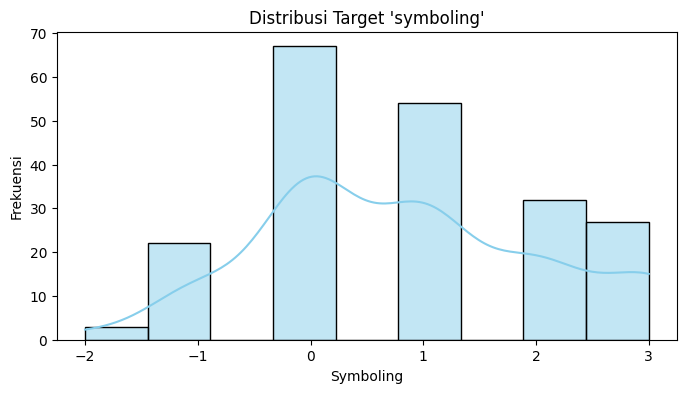

In [11]:
# Eksplorasi awal dataset
print("Contoh Data:")
print(df.head())
print("Ukuran Dataset:", df.shape)

# Visualisasi distribusi target 'symboling'
plt.figure(figsize=(8,4))
sns.histplot(df['symboling'], kde=True, color='skyblue')
plt.title("Distribusi Target 'symboling'")
plt.xlabel("Symboling")
plt.ylabel("Frekuensi")
plt.show()

#Praproses Data

In [14]:
# 2. Praproses Data
# Hapus baris dengan missing value
df = df.dropna()

# Definisikan target dan fitur
target = 'symboling'
X = df.drop(columns=[target])
y = df[target]

# Tampilkan beberapa baris fitur awal
print("\nFitur Awal:")
print(X.head())


Fitur Awal:
      price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
3   13950.0           30        24    5500.0       102.0               10.0   
4   17450.0           22        18    5500.0       115.0                8.0   
6   17710.0           25        19    5500.0       110.0                8.5   
8   23875.0           20        17    5500.0       140.0                8.3   
10  16430.0           29        23    5800.0       101.0                8.8   

    stroke  bore fuel-system  engine-size  ...  length wheel-base  \
3      3.4  3.19        mpfi          109  ...   176.6       99.8   
4      3.4  3.19        mpfi          136  ...   176.6       99.4   
6      3.4  3.19        mpfi          136  ...   192.7      105.8   
8      3.4  3.13        mpfi          131  ...   192.7      105.8   
10     2.8  3.50        mpfi          108  ...   176.8      101.2   

    engine-location  drive-wheels  body-style  num-of-doors  aspiration  \
3             front   

In [15]:
# Lakukan one-hot encoding pada fitur kategorikal
X_encoded = pd.get_dummies(X, drop_first=True)
print("\nFitur Setelah One-Hot Encoding:")
print(X_encoded.head())


Fitur Setelah One-Hot Encoding:
      price  highway-mpg  city-mpg  peak-rpm  horsepower  compression-ratio  \
3   13950.0           30        24    5500.0       102.0               10.0   
4   17450.0           22        18    5500.0       115.0                8.0   
6   17710.0           25        19    5500.0       110.0                8.5   
8   23875.0           20        17    5500.0       140.0                8.3   
10  16430.0           29        23    5800.0       101.0                8.8   

    stroke  bore  engine-size  num-of-cylinders  ...  make_mitsubishi  \
3      3.4  3.19          109                 4  ...            False   
4      3.4  3.19          136                 5  ...            False   
6      3.4  3.19          136                 5  ...            False   
8      3.4  3.13          131                 5  ...            False   
10     2.8  3.50          108                 4  ...            False   

    make_nissan  make_peugot  make_plymouth  make_por

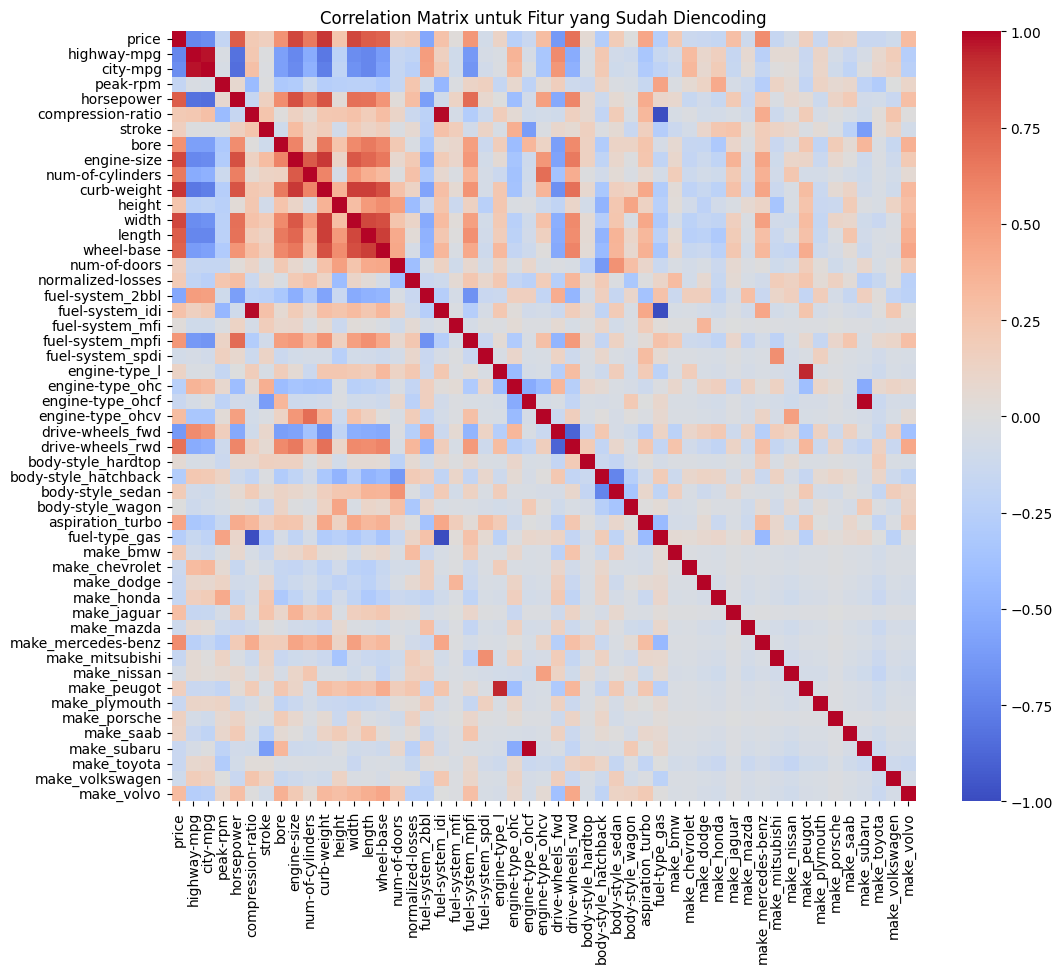

In [16]:
# Visualisasi Correlation Matrix untuk fitur yang sudah diencoding
plt.figure(figsize=(12,10))
sns.heatmap(X_encoded.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Matrix untuk Fitur yang Sudah Diencoding")
plt.show()


#Pembuatan Model

In [21]:
# Membagi dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)
print("\nUkuran Train Set:", X_train.shape)
print("Ukuran Test Set:", X_test.shape)

# Membuat dan Melatih Model Regresi Linier
model = LinearRegression()
model.fit(X_train, y_train)

# Melakukan prediksi pada data testing
y_pred = model.predict(X_test)



Ukuran Train Set: (127, 51)
Ukuran Test Set: (32, 51)


#Evaluasi

In [22]:
# Evaluasi Model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("\nEvaluasi Model:")
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)



Evaluasi Model:
Mean Squared Error (MSE): 0.6676419589654023
Root Mean Squared Error (RMSE): 0.8170936047757333
R-squared (R²): 0.5451328236988875


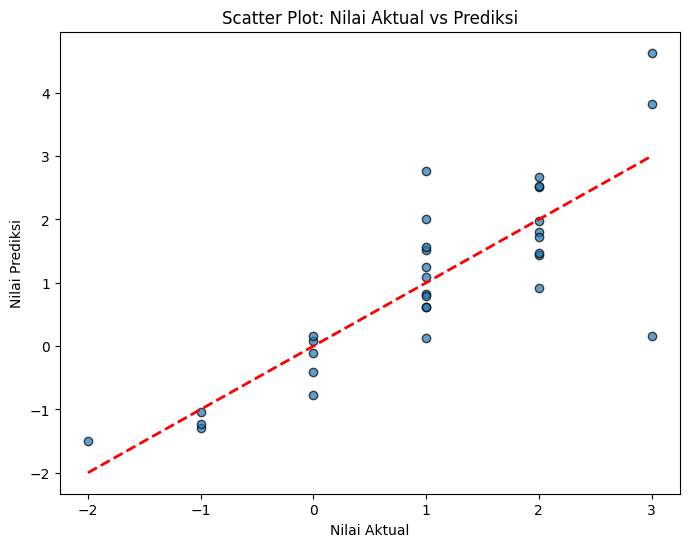

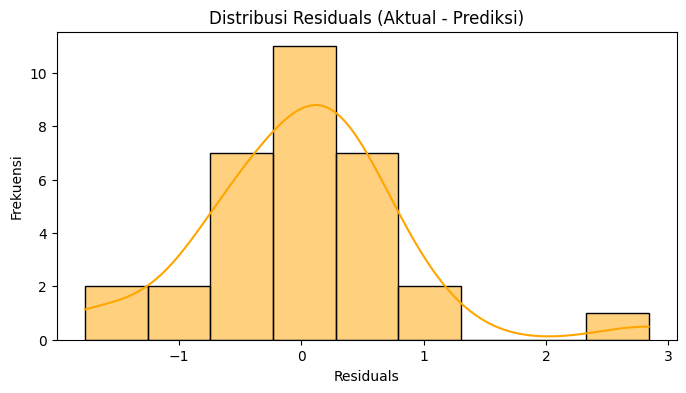

<ipython-input-23-848e18359424>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")


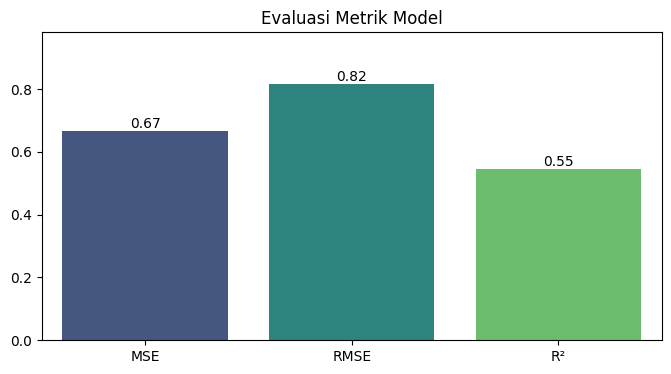

In [23]:
# a. Scatter plot Prediksi vs Aktual
plt.figure(figsize=(8,6))
plt.scatter(y_test, y_pred, edgecolors=(0, 0, 0), alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Nilai Aktual")
plt.ylabel("Nilai Prediksi")
plt.title("Scatter Plot: Nilai Aktual vs Prediksi")
plt.show()

# b. Distribusi Residuals
residuals = y_test - y_pred
plt.figure(figsize=(8,4))
sns.histplot(residuals, kde=True, color='orange')
plt.title("Distribusi Residuals (Aktual - Prediksi)")
plt.xlabel("Residuals")
plt.ylabel("Frekuensi")
plt.show()

# c. Bar Chart Evaluasi Metrik
# Untuk MSE dan RMSE, nilai error, sedangkan R² merupakan koefisien determinasi (semakin mendekati 1 semakin baik)
metrics = {'MSE': mse, 'RMSE': rmse, 'R²': r2}
plt.figure(figsize=(8,4))
sns.barplot(x=list(metrics.keys()), y=list(metrics.values()), palette="viridis")
plt.title("Evaluasi Metrik Model")
plt.ylim(0, max(mse, rmse)*1.2)  # Menyesuaikan skala grafik untuk MSE dan RMSE
for index, value in enumerate(metrics.values()):
    plt.text(index, value, f"{value:.2f}", ha='center', va='bottom')
plt.show()


# Model Regresi Linier: Penjelasan Matematis

---

## 1. **Model Regresi Linier**
Persamaan dasar model regresi linier:

$$
y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \dots + \beta_p x_p + \epsilon
$$

**Keterangan:**

- $ y $: Variabel target (contoh: `symboling`).
- $ x_1, x_2, \dots, x_p $: Variabel prediktor/fitur.
- $ \beta_0 $: Intercept (nilai $ y $ saat semua $ x_i = 0 $.
- $ \beta_1, \beta_2, \dots, \beta_p $: Koefisien regresi yang mengukur pengaruh fitur.
- $ \epsilon $: Error term (galat acak).



## 2. **Metode Estimasi Koefisien (OLS)**
Tujuan: Meminimalkan **Sum of Squared Errors (SSE)**:

$$
\text{SSE} = \sum_{i=1}^{n} \left( y_i - \hat{y}_i \right)^2 = \sum_{i=1}^{n} \left( y_i - (\beta_0 + \beta_1 x_{1i} + \dots + \beta_p x_{pi}) \right)^2
$$

Solusi optimal diperoleh melalui **Normal Equation**:

$$
\boldsymbol{\hat{\beta}} = (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{y}
$$

**Keterangan:**
- $ \mathbf{X} $: Matriks fitur berukuran \( n \times (p+1) \) (termasuk kolom 1 untuk intercept).
- $ \mathbf{y} $: Vektor target berukuran \( n \times 1 \).
- $ \boldsymbol{\hat{\beta}} $: Vektor koefisien terestimasi.



## 3. **Evaluasi Model**

### a. **Mean Squared Error (MSE)**
$$
\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
$$
- Semakin kecil MSE, semakin baik model.

### b. **Root Mean Squared Error (RMSE)**
$$
\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$
- Error dalam satuan yang sama dengan \( y \).

### c. **Koefisien Determinasi (\( R^2 \))**
$$
R^2 = 1 - \frac{\text{SSE}}{\text{TSS}} = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{n} (y_i - \bar{y})^2}
$$
- $ R^2 $ bernilai antara 0 dan 1.  
- Semakin mendekati 1, semakin baik model menjelaskan variansi data.

